indexing and assinging to a position with python lists are O(1)
2 ways to grow a list - appending or concatenating 
* append is O(1)
* concatenation operator is O(k)

In [1]:
%matplotlib inline
import plotnine as p9
from timeit import Timer
import pandas as pd
import random

In [2]:
def test1():
    l = []
    for i in range(1000):
        l = l + [i]

def test2():
    l = []
    for i in range(1000):
        l.append(i)
        
def test3():
    l = [i for i in range(1000)]
    
def test4():
    l = list(range(1000))

In [3]:
t1 = Timer("test1()", "from __main__ import test1")
t2 = Timer("test2()", "from __main__ import test2")
t3 = Timer("test3()", "from __main__ import test3")
t4 = Timer("test4()", "from __main__ import test4")


In [4]:
print(f"concatenation: {t1.timeit(number = 1000):15.2f} mill")
print(f"appending: {t2.timeit(number=1000):19.2f} milliseconds")
print(f"list comprehension: {t3.timeit(number=1000):10.2f} milliseconds")
print(f"list range: {t4.timeit(number=1000):18.2f} milliseconds")


concatenation:            1.98 mill
appending:                0.08 milliseconds
list comprehension:       0.06 milliseconds
list range:               0.04 milliseconds


# Excercise Questions

## 1
### Devise an experiment to verify that the list index operator is 𝑂(1)

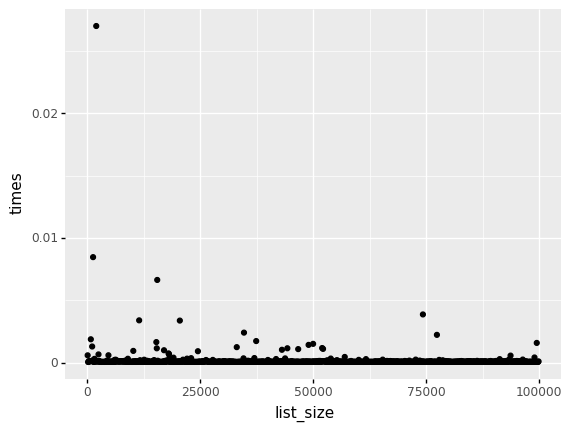

<ggplot: (8772773860554)>

In [5]:
o_one_list = Timer("x[i - 4]", "from __main__ import x, i")
times = list()
for i in range(100, 100_000,100):
    x = list(range(i))
    times.append(o_one_list.timeit(number=1000))
    
df = pd.DataFrame({"list_size": list(range(100, 100_000,100)), "times": times})

(p9.ggplot(data=df,
           mapping=p9.aes(x='list_size', y='times'))
    + p9.geom_point()
)


## 2 
### Devise an experiment to verify that get item and set item are 𝑂(1) for dictionaries.

In [6]:
o_one_dictionary = Timer("a_dictionary[i - 4]", "from __main__ import a_dictionary, i")
o_one_dictionary_set = Timer("a_dictionary[i - 4] = 'x'", "from __main__ import a_dictionary, i")

dict_times = list()
dict_times_set = list()
sizes_to_run = range(100, 100_000,100)
for i in sizes_to_run:
    keys_list = list(range(i))
    values_list = list(range(i))
    a_dictionary = dict(zip(keys_list, values_list))
    dict_times.append(o_one_dictionary.timeit(number=1000))
    dict_times_set.append(o_one_dictionary_set.timeit(number=1000))

    



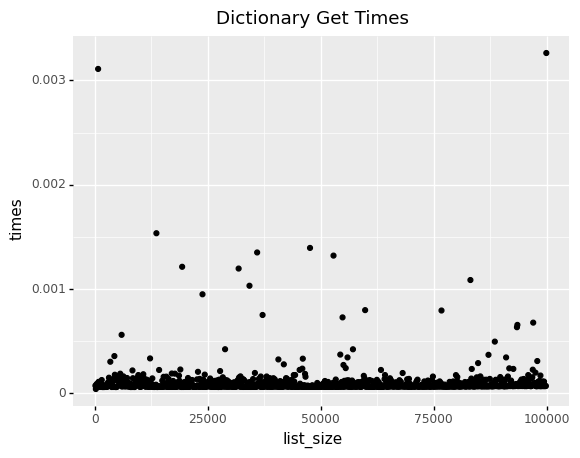

<ggplot: (8772774257387)>

In [7]:
df2 = pd.DataFrame({"list_size": sizes_to_run, "times": dict_times})
df3 = pd.DataFrame({"list_size": sizes_to_run, "times": dict_times_set})

(p9.ggplot(data=df2,
           mapping=p9.aes(x='list_size', y='times'))
    + p9.geom_point() +
 p9.ggtitle("Dictionary Get Times")
)


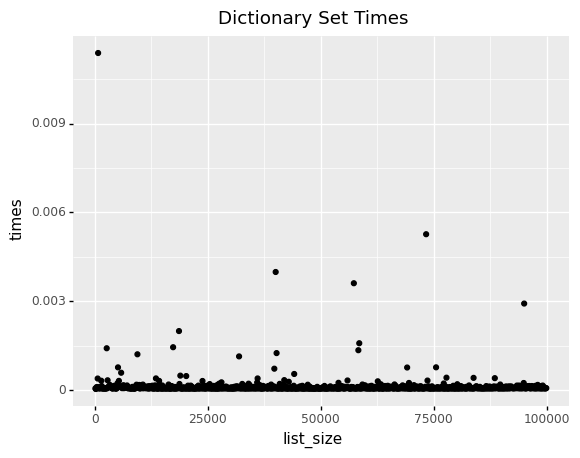

<ggplot: (8772774317300)>

In [8]:

(p9.ggplot(data=df3,
           mapping=p9.aes(x='list_size', y='times'))
    + p9.geom_point() +
 p9.ggtitle("Dictionary Set Times")
)

## 3 
### Devise an experiment that compares the performance of the `del` operator on lists and dictionaries.

In [9]:
def gen_and_delete_dictionary(i):      
    keys_list = list(range(i))
    a_list = list(range(i))
    a_dictionary = dict(zip(keys_list, a_list))

    del a_dictionary[42]
    
def gen_and_delete_list(i):      

    a_list = list(range(i))

    del a_list[42] 

del_dict = Timer("gen_and_delete_dictionary(i)", "from __main__ import gen_and_delete_dictionary, i")
del_list = Timer("gen_and_delete_list(i)", "from __main__ import gen_and_delete_list, i ")
del_dict_times = list()
del_list_times = list()
sizes_to_run = range(100, 10_000,100)
for i in sizes_to_run:
    del_dict_times.append(del_dict.timeit(number=1000))
    del_list_times.append(del_list.timeit(number=1000))
    
df_potato = pd.DataFrame({"list_size": sizes_to_run, "dict_times": del_dict_times,"list_times": del_list_times})


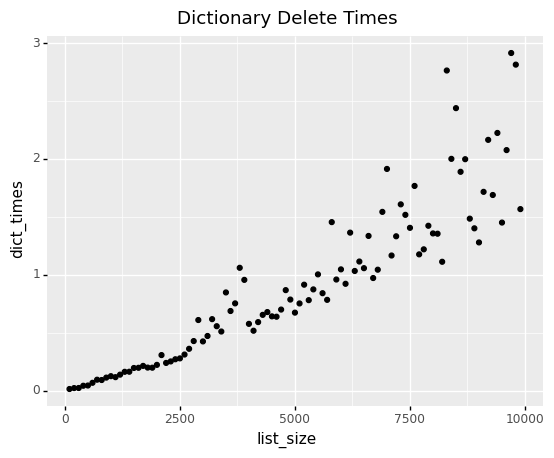

<ggplot: (8772774162240)>

In [10]:
(p9.ggplot(data=df_potato,
           mapping=p9.aes(x='list_size', y='dict_times'))
    + p9.geom_point() +
 p9.ggtitle("Dictionary Delete Times")
)

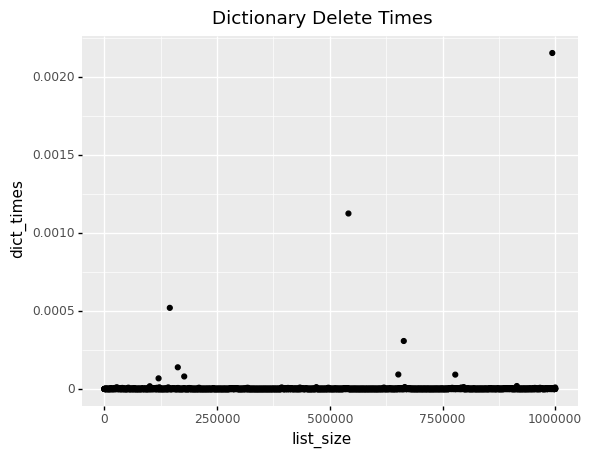

<ggplot: (8772774162348)>

In [11]:
sizes_to_run = range(100, 1_000_000,100)
sizes_to_run2 = range(1_000_000, 100, -100)
keys_list = list(sizes_to_run)
a_list = list(sizes_to_run)
a_dictionary = dict(zip(keys_list, a_list))

keys_list[len(a_dictionary) - 1]

del_dict = Timer("del a_dictionary[keys_list[len(a_dictionary) - 1]]", "from __main__ import keys_list, a_dictionary")
del_list = Timer("del a_list[-1]", "from __main__ import a_list ")
del_dict_times = list()
del_list_times = list()




for i in sizes_to_run:
    del_dict_times.append(del_dict.timeit(number=1))
    del_list_times.append(del_list.timeit(number=1))
    
df_parsnip = pd.DataFrame({"list_size": sizes_to_run2, "dict_times": del_dict_times,"list_times": del_list_times})

(p9.ggplot(data=df_parsnip,
           mapping=p9.aes(x='list_size', y='dict_times'))
    + p9.geom_point() +
 p9.ggtitle("Dictionary Delete Times")
)

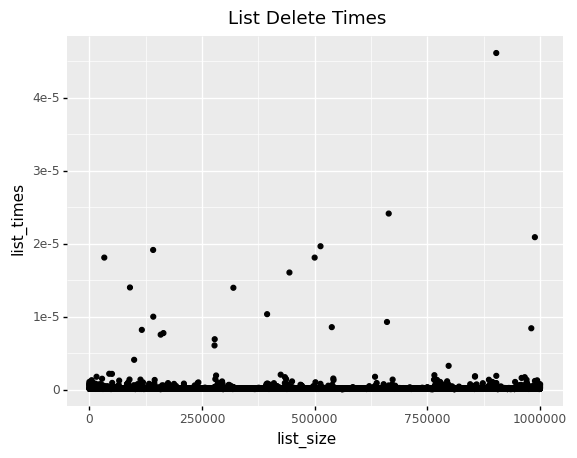

<ggplot: (8772774317174)>

In [12]:
df_parsnip = pd.DataFrame({"list_size": sizes_to_run2, "dict_times": del_dict_times,"list_times": del_list_times})

(p9.ggplot(data=df_parsnip,
           mapping=p9.aes(x='list_size', y='list_times'))
    + p9.geom_point() +
 p9.ggtitle("List Delete Times")
)

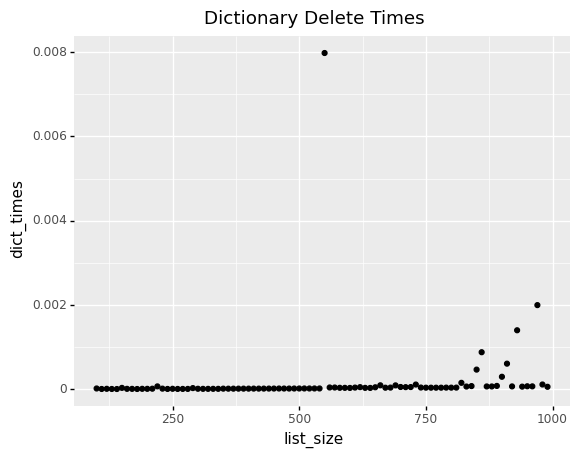

<ggplot: (8772774548194)>

In [13]:
del_dict = Timer("cp = a_dictionary.copy(); del cp[3]", "from __main__ import a_dictionary")
del_list = Timer("cp = a_list.copy(); del cp[3]", "from __main__ import a_list")
del_dict_times = list()
del_list_times = list()

for i in range(100, 1000,10):
    
    keys_list = list(range(i))
    a_list = list(range(i))
    a_dictionary = dict(zip(keys_list, a_list))
    
    del_dict_times.append(del_dict.timeit(number=10))
    del_list_times.append(del_list.timeit(number=10))

df3 = pd.DataFrame({"list_size": range(100, 1000,10), "dict_times": del_dict_times,"list_times": del_list_times})

(p9.ggplot(data=df3,
           mapping=p9.aes(x='list_size', y='dict_times'))
    + p9.geom_point() +
 p9.ggtitle("Dictionary Delete Times")
)

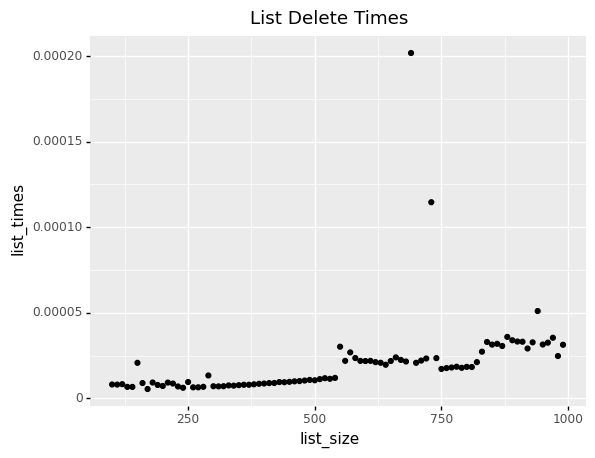

<ggplot: (8772774285984)>

In [14]:
(p9.ggplot(data=df3,
           mapping=p9.aes(x='list_size', y='list_times'))
    + p9.geom_point() +
 p9.ggtitle("List Delete Times")
)

## 4
### Given a list of numbers in random order, write an algorithm that works in 𝑂(𝑛log(𝑛)) to find the kth smallest number in the list.

This is obvious to solve once you remember that sorting a python list is 𝑂(𝑛log(𝑛)) and indexing is O(1) so the algorithm, which I won't even write up here could simply be:

`unsorted_list.sort()[k - 1]`


## 5
### Can you improve the algorithm from the previous problem to be linear? Explain.

To solve in the simple case, lets say k == 3, so the 3 smallest number
First I'm going to make a linear sort function for sorting three numbers

In [15]:
def three_sort_function(one,two,three):
    if one > two:
        if one > three:
            if three > two:
                three_sort = [one,three,two]
            else:
                three_sort = [one,two,three]
        else:
            three_sort = [three,one,two]

    else:
        if two > three:
            if one > three:

                three_sort = [two,one,three]
            else:
                three_sort = [two,three,one]
        else:

            three_sort = [three, two, one]
            
    return three_sort

I'm just testing here that my sort function works

In [16]:
def test_my_function():
    my_list = random.sample(range(0, 1000), 10)
    one = my_list.pop()
    two = my_list.pop()
    three = my_list.pop()
#     print(f'one: {one}, two: {two}, three: {three}')
    fun_return = three_sort_function(one,two,three)
#     print("My function returned:")
#     print(fun_return)
    test = [one,two,three]
    test.sort(reverse = True)
#     print("Correct Order:")

#     print(test)
    
    return test == fun_return


def averageOfList(numOfList):
    avg = sum(numOfList) / len(numOfList)
    return avg


succ = [False] * 100_000
for i,v in enumerate(succ):
    succ[i] = test_my_function()
    
averageOfList(succ)

1.0

Make sure that it returns as expected

In [17]:
def linear_third_smallest(unsorted_list):
    cp = unsorted_list.copy()
    one = unsorted_list.pop()
    two = unsorted_list.pop()
    three = unsorted_list.pop()
    ## now we're going to put these three into an order
    sorted_three = three_sort_function(one,two,three)
    ##and go through each
    for n in unsorted_list:
        if n < sorted_three[0]:
            sorted_three[0] = n
        sorted_three = three_sort_function(sorted_three[0],sorted_three[1],sorted_three[2])

    return cp,sorted_three

unsorted_list,sorted_three = linear_third_smallest(random.sample(range(0, 1000), 10))
unsorted_list.sort()
print(unsorted_list[2])
sorted_three[0]

132


132

In [18]:
def linear_third_smallest(unsorted_list):

    one = unsorted_list.pop()
    two = unsorted_list.pop()
    three = unsorted_list.pop()
    ## now we're going to put these three into an order
    sorted_three = three_sort_function(one,two,three)
    ##and go through each
    for n in unsorted_list:
        if n < sorted_three[0]:
            sorted_three[0] = n
        sorted_three = three_sort_function(sorted_three[0],sorted_three[1],sorted_three[2])

    return sorted_three[0]

def obs_log(unsorted_list):
    unsorted_list.sort()
    return unsorted_list[2]

test = random.sample(range(0, 1000), 10)
test2 = test.copy()
print(linear_third_smallest(test))
print(obs_log(test2))


429
429


In [19]:
linear_sort_third = Timer("linear_third_smallest(a_list)", "from __main__ import linear_third_smallest,a_list")
linear_sort_time = list()

a_more_reasonable_sort = Timer("obs_log(a_list2)", "from __main__ import obs_log,a_list2")
log_reasonable_sort_time = list()

sizes_to_run = range(100, 100_000,100)
for i in sizes_to_run:
    a_list = random.sample(range(0, i), i)
    a_list2 = a_list.copy()
    linear_sort_time.append(linear_sort_third.timeit(number=1))
    log_reasonable_sort_time.append(a_more_reasonable_sort.timeit(number=1))

    

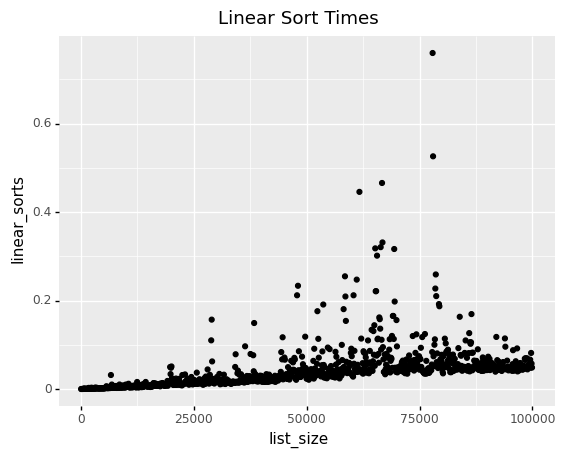

<ggplot: (8772774540951)>

In [20]:
df_sort = pd.DataFrame({"list_size": range(100, 100_000,100), "linear_sorts": linear_sort_time, "log_sort":log_reasonable_sort_time})

(p9.ggplot(data=df_sort,
           mapping=p9.aes(x='list_size', y='linear_sorts'))
    + p9.geom_point() +
 p9.ggtitle("Linear Sort Times")
)

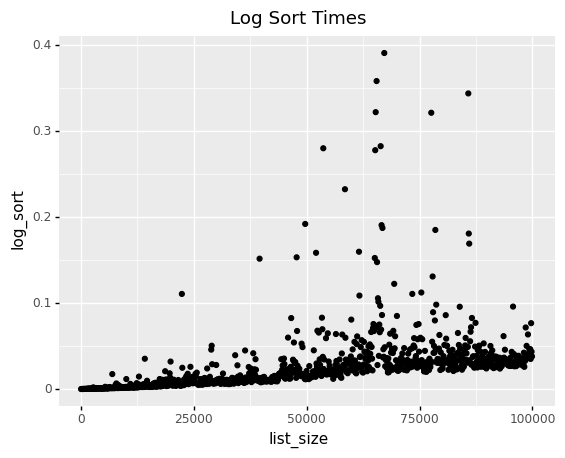

<ggplot: (8772775087653)>

In [21]:
(p9.ggplot(data=df_sort,
           mapping=p9.aes(x='list_size', y='log_sort'))
    + p9.geom_point() +
 p9.ggtitle("Log Sort Times")
)

So we can improve on it, but it require space, e.g. here we're keeping tracking of at least three, but as k gets larger and larger we have to ask ourselves, is it worth it to keep track of that many variables?